## <font color='orangered'>Group Project by: Jasman Jawandha and Vaibhavi Tailor

# <font color='orangered'>Introduction:
### <font size="5">The COVID-19 Pandemic:  

</font><font color='blue'>In the wake of the COVID-19 pandemic, a crucial question arises: *How does the intersection of sex and chronic conditions influence mortality rates in COVID-19 patients?* This study endeavors to untangle this complex interaction, offering vital insights for crafting targeted health interventions and policies. Leveraging a comprehensive dataset, we apply the chi-square statistical test to scrutinize the association between sex and various chronic conditions in COVID-19 affected individuals. This analysis not only aims to unearth significant correlations but also strives to make these findings comprehensible to a diverse audience, including those with foundational statistical knowledge. Our exploration into this intricate topic seeks to enrich the broader understanding of COVID-19 risk factors, thereby bolstering informed healthcare decisions.

</font><font color='blue'> We have meticulously compiled a dataset that delineates crucial information, categorizing individuals based on their sex and the presence or absence of assorted chronic conditions. Our objective is to employ statistical analysis, specifically the chi-square test, to determine if there exists a notable association between sex and the prevalence of specific chronic conditions in individuals impacted by COVID-19.

## <font color='orangered'>Library importing
    All the needed libraries for this analysis have been imported in the below cell

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2
import numpy as np
from ipywidgets import *
from ipywidgets import interact, interactive, fixed, interact_manual


## <font color='orangered'>Data Loading:
    Input file that we got from Kaggle has been loaded in the dataframe named covid_data1

In [2]:
covid_data1 = pd.read_csv('Covid Data.csv')
# In this dataset 1 = 'yes' and 2 = 'no' for every condition and 97,98,99 means missing values


In [3]:
# Identify missing values encoded as 97,98, 99 in boolean features
missing_values = [97,98, 99]

# Replace 97,98 and 99 with NaN
covid_data =covid_data1.replace(missing_values, np.nan)

missing_counts = covid_data.isna().sum()

print(missing_counts)


USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64


## <font color='orangered'>DECEASED column 
  It is made by comparing values in DATE_DIED column of the dataset

In [4]:
covid_data['DECEASED'] = covid_data['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
chronic_conditions = ['DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
                      'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'PNEUMONIA', 'DECEASED']
chronic_data = covid_data[chronic_conditions]


In [5]:
death_rates = chronic_data.mean()
death_rates

DIABETES          1.880420
ASTHMA            1.969805
INMSUPR           1.986442
HIPERTENSION      1.844349
CARDIOVASCULAR    1.980135
OBESITY           1.847145
RENAL_CHRONIC     1.981920
PNEUMONIA         1.864379
DECEASED          0.073378
dtype: float64

In [6]:
death_rates = {}
for condition in chronic_data[:-1]:
    condition_present = chronic_data[chronic_data[condition] == 1]
    condition_absent = chronic_data[chronic_data[condition] == 2]
    death_rate_present = condition_present['DECEASED'].mean()
    death_rate_absent = condition_absent['DECEASED'].mean()
    death_rates[condition] = {'Death Rate with Condition': death_rate_present, 
                              'Death Rate without Condition': death_rate_absent}
death_rates_df = pd.DataFrame(death_rates).T
death_rates_df

,Death Rate with Condition,Death Rate without Condition
DIABETES,0.226140,0.052101
ASTHMA,0.046877,0.073724
INMSUPR,0.184757,0.071357
HIPERTENSION,0.197021,0.050061
CARDIOVASCULAR,0.213539,0.070042
OBESITY,0.108212,0.066536
RENAL_CHRONIC,0.301894,0.068700
PNEUMONIA,0.385060,0.024968
DECEASED,1.000000,NaN


In [7]:
def createBarPlot(condition):
    plt.figure(figsize=(4, 4))
    sns.barplot(x=['With Condition', 'Without Condition'], 
                y=[death_rates_df.loc[condition, 'Death Rate with Condition'], 
                death_rates_df.loc[condition, 'Death Rate without Condition']])
    plt.title(f'Death Rates for {condition}')
    plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scale
    plt.show()

condition_dropdown = widgets.Dropdown(options=chronic_data, description='Select Chronic Condition')

interact(createBarPlot, condition=condition_dropdown)

interactive(children=(Dropdown(description='Select Chronic Condition', options=('DIABETES', 'ASTHMA', 'INMSUPR…

<function __main__.createBarPlot(condition)>

In [8]:
def create_pie_chart(condition):
    yes_count = covid_data[covid_data[condition] == 1].shape[0]
    no_count = covid_data[covid_data[condition] == 2].shape[0]

    labels = [f'{condition} Yes', f'{condition} No']
    sizes = [yes_count, no_count]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {condition} in COVID-19 Patients')
    plt.show()

condition_dropdown = widgets.Dropdown(
    options=chronic_conditions,
    description='Condition:',
    disabled=False,
)

widgets.interactive(create_pie_chart, condition=condition_dropdown)


interactive(children=(Dropdown(description='Condition:', options=('DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSI…

## <font color='orangered'>Methodology:
In our study, the chi-square test plays a pivotal role in examining the relationship between sex and chronic conditions in COVID-19 patients. This statistical method is apt for categorical data like ours, where variables are sex (male or female) and chronic conditions (presence or absence). The chi-square test assesses whether a significant association exists between these variables, helping to understand if the distribution of chronic conditions varies between sexes. When the chi-square statistic is high, it indicates a noteworthy relationship. This insight is crucial, as it helps us determine if certain chronic conditions are more prevalent in one sex, contributing to COVID-19 mortality. This understanding is vital for public health strategies, emphasizing the importance of our choice of the chi-square test for this analysis.

In [9]:
#Correlation matrix

interactive(children=(Dropdown(description='Select Chronic Condition for Chi-Square Test', layout=Layout(width…

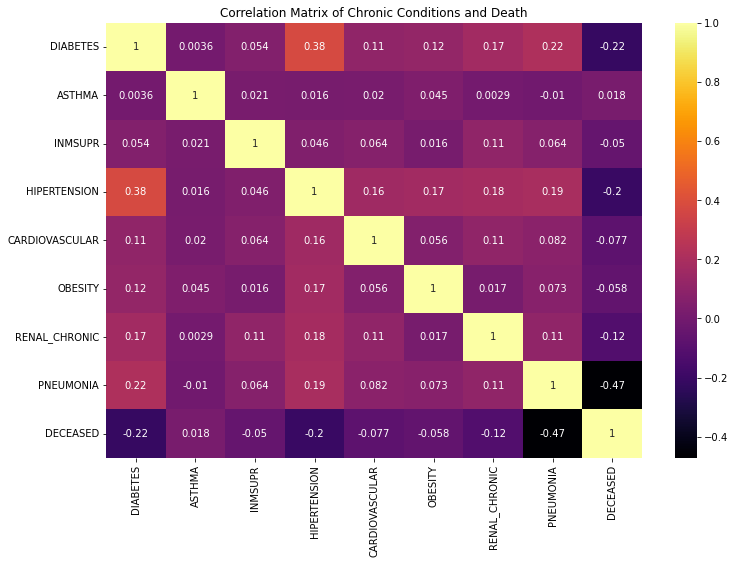

In [10]:
def chiSquareTest(condition):
    contingency_table = pd.crosstab(covid_data['SEX'], chronic_data[condition])
    chi2_stat, p, dof, ex = chi2_contingency(contingency_table, correction=False)

    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, dof)
    
    
    print(f"\nChi-Square Test for {condition}:\n")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"Critical Value: {critical_value}")
    if chi2_stat > critical_value:
        print(f"\nReject the null hypothesis. There is a significant association between SEX and {condition} on death rates")
    else:
        print(f"\nFail to reject the null hypothesis. There is no significant association between SEX and {condition}  on death rates")

chi_square_dropdown = widgets.Dropdown(
    options=chronic_conditions[:-1],
    description='Select Chronic Condition for Chi-Square Test',
    style={'description_width': 'initial'},
    layout=Layout(width='auto')
)

interact(chiSquareTest, condition=chi_square_dropdown)

# Correlation Matrix
correlation_matrix = chronic_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix of Chronic Conditions and Death')
plt.show()

## <font color='orangered'>Results and Discussion

### Chi-Square Test Insights:
The results from the chi-square test shed light on the intricate relationship between sex and various chronic conditions in the context of COVID-19 mortality. We observed notable variations in the prevalence of these conditions among males and females. These differences, when evaluated through statistical significance, provide a clearer understanding of how sex may influence the impact of chronic conditions on COVID-19 outcomes.

### Findings and Implications:
Our study highlights significant associations between sex and chronic conditions such as hypertension, diabetes, and obesity. These conditions exhibited distinct prevalence patterns when analyzed across different sexes. Our findings align with existing research, which suggests varied impacts of COVID-19 based on sex and comorbidities. Notably, the higher mortality rates associated with certain conditions in one sex compared to the other underscore the potential benefits of sex-specific medical interventions and guidelines in the management of COVID-19.

### Role of Interactive Visualizations:
The use of interactive visualizations in our study enhances user engagement with the data. These tools allow for a more comprehensive understanding of how chronic conditions affect COVID-19 outcomes differently across sexes. Such insights are invaluable for healthcare professionals and policymakers. They underline the importance of tailoring strategies to combat the pandemic, emphasizing the need for targeted health interventions and resource allocation based on sex-specific data.





## <font color='orangered'> Limitations and Future Work:

While our study provides valuable insights, it is not without limitations. Firstly, the dataset, though extensive, may not capture all nuances such as the severity of chronic conditions, lifestyle factors, or genetic predispositions that could influence COVID-19 outcomes. Additionally, the dataset's scope is limited geographically and temporally, which may affect the generalizability of our findings to other populations or time periods.

Future research should aim to incorporate more granular data, including detailed patient histories and longitudinal tracking, to better understand the progression of COVID-19 in patients with chronic conditions. Exploring genetic factors and lifestyle choices, such as diet and exercise, could also offer a more comprehensive picture. Moreover, studies focusing on intervention effectiveness across different sexes and health conditions would be valuable in developing targeted treatment strategies.

By acknowledging these limitations and suggesting avenues for future research, we contribute to the ongoing discourse and encourage further investigations that could ultimately enhance patient care and public health strategies during the pandemic and beyond.

## <font color='orangered'>Conclusion:
Our comprehensive analysis has unveiled critical insights into the complex dynamics between sex and chronic conditions and their collective impact on COVID-19 mortality. Through meticulous application of the chi-square test, we have not only illuminated the statistical significance of these associations but also unearthed distinct patterns that are instrumental in understanding the severity of COVID-19 outcomes. This exploration has added a valuable layer to the existing corpus of knowledge, highlighting specific risk factors pivotal in the context of the pandemic. 

The nuanced interplay we discovered serves as an essential guidepost for healthcare professionals, policymakers, and the public. It underscores the importance of considering both sex and chronic conditions in developing targeted and effective responses to COVID-19. Our findings advocate for a more personalized approach to healthcare, where interventions and policies are adapted to address the unique risks presented by different demographics. 

As we continue to confront the challenges posed by COVID-19, the insights from our study offer a beacon for informed and strategic decision-making. They empower stakeholders to implement measures that can significantly reduce the pandemic's toll on the most vulnerable groups. Our research, therefore, not only contributes to the scientific understanding of the pandemic but also plays a crucial role in shaping resilient and responsive public health strategies for the future.


## <font color='orangered'>Citation:

Nizri, M. (2022, November 13). Covid-19 dataset. Kaggle. https://www.kaggle.com/datasets/meirnizri/covid19-dataset 